<a href="https://colab.research.google.com/github/Rinniedh/High-Income-Project/blob/main/High_Income_Prediction_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
#This Python notebook will attempt to validate your CSV predictions file. It does this by checking
#that the file contains one prediction for all 3000 consumers, and that each prediction is within the
#set of acceptable values. This notebook does NOT check whether your predictions are correct!!

#INSTRUCTIONS:
#1. Upload your CSV predictions file to your Colab notebook's session storage.
#2. Type the name of the predictions file that you would like to validate below.
#   For example: filename = 'Soper, Daniel.csv'
#3. Run the notebook!
Data= 'IncomeData.csv'

#import the CSV library
import csv

#define lists of acceptable salary category values and consumer IDs
salary_category_values = ['0', '1']
consumer_ids = [str(id) for id in range(20001, 23001)]

#load predictions from the CSV file
with open(Data) as csvfile:
  predictions = csv.DictReader(csvfile, fieldnames=['consumer_id', 'salary_category'])

  #holds consumer IDs that have been checked
  checked_ids = []

  #holds the results of the validation check
  results = ''

  #for each prediction in the CSV file
  for prediction in predictions:
    #if this is a valid consumer ID
    if prediction['consumer_id'] in consumer_ids:
      #if this consumer ID has not been seen already
      if prediction['consumer_id'] not in checked_ids:
        checked_ids.append(prediction['consumer_id'])
      else: #if this consumer ID has already been seen
        results += 'The CSV file contains multiple predictions for consumer ID: ' + prediction['consumer_id'] + '.\n'
    else: #if this is not a valid consumer ID
      results += 'The CSV file contains a prediction for an invalid consumer ID: ' + prediction['consumer_id'] + '.\n'
      print(prediction)
    #if the predicted salary category value is not in the set of acceptable values
    if prediction['salary_category'] not in salary_category_values:
      results += prediction['salary_category'] + ' is not a valid salary category prediction.\n'
  #if there is not a prediction for all 3000 consumers
  if len(checked_ids) < 3000:
    results += 'A prediction is missing for the following consumer ID(s):\n'
    for consumer_id in consumer_ids:
      if consumer_id not in checked_ids:
        results += consumer_id + '.\n'
  elif len(checked_ids) > 3000: #if there are too many predictions in the CSV file
    results += 'The CSV file contains more than 3000 predictions.'
  elif results == '': #if everything appears to be OK
    results = 'Your CSV file appears to be valid!'

  print(results)


Streaming output truncated to the last 5000 lines.
{'consumer_id': '15001', 'salary_category': '59', None: ['non_government', 'associates_degree_academic', 'widowed', '0', '3', '0', '0', '0', '40', '20', '0']}
{'consumer_id': '15002', 'salary_category': '50', None: ['non_government', 'some_college', 'married', '2', '1', '1', '0', '0', '40', '15', '1']}
{'consumer_id': '15003', 'salary_category': '42', None: ['government_federal', 'masters_degree', 'married', '1', '3', '1', '0', '5852', '40', '20', '1']}
{'consumer_id': '15004', 'salary_category': '66', None: ['non_government', 'bachelors_degree', 'married', '1', '3', '1', '0', '0', '40', '20', '1']}
{'consumer_id': '15005', 'salary_category': '24', None: ['non_government', 'high_school', 'never_married', '10', '3', '1', '0', '0', '40', '20', '0']}
{'consumer_id': '15006', 'salary_category': '53', None: ['government_local', 'high_school', 'married', '0', '3', '1', '0', '0', '60', '20', '0']}
{'consumer_id': '15007', 'salary_category': '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [142]:
 ## The Start of the Project
  ## 1. Define/Understand the Purpose: We are trying to build a model to accurately predict who has a high income.
  ## 2. We will set aside 3000 records as testing data for the model.

#import the pandas library
import pandas as pd

#load the CSV file into a pandas dataframe
df = pd.read_csv('IncomeData.csv', index_col='id')

#*** perform your data cleaning / preparation tasks here ***

#create a dataframe containing only those rows for which an
#income prediction needs to be made
df_predict = df[pd.isnull(df.high_income) == True].copy()

#remove all incomplete rows from the 'df' dataframe
df = df[pd.isnull(df.high_income) == False].copy()

# Now 'Data' contains the remaining records, and 'Test3000_df' contains the first 3000 records
print(f"Size of df: {len(Data)}")
print(f"Size of df_predict: {len(df_predict)}")


Size of df: 14
Size of df_predict: 3000


In [143]:
## 3. Explore, clean, pre-process data
import pandas as pd

## I learn that for data type we do have 3 object columns. If I run into an issue where I need to convert to a float dummy code I will for certain algorithms.
data_type = type(df)
print(f"Data type of 'Data': {data_type}")

df.info()

## Checking for missing data ( We got none, rare)
missing_data = df.isnull().sum()
print(missing_data)

descriptive_stats = df.describe()
print(descriptive_stats)


Data type of 'Data': <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1 to 20000
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          20000 non-null  int64  
 1   employer_type                20000 non-null  object 
 2   highest_education_completed  20000 non-null  object 
 3   marital_status               20000 non-null  object 
 4   occupation_code              20000 non-null  int64  
 5   race_code                    20000 non-null  int64  
 6   gender                       20000 non-null  int64  
 7   capital_gains                20000 non-null  int64  
 8   capital_losses               20000 non-null  int64  
 9   hours_worked_per_week        20000 non-null  int64  
 10  native_country_code          20000 non-null  int64  
 11  high_income                  20000 non-null  float64
dtypes: float64(1), int64

In [144]:
##Data Transformation(Data Encoding): Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.

import pandas as pd

# Create dummy variables for employer_type
employer_type_dummies = pd.get_dummies(df["employer_type"], prefix="employer_type", drop_first=True)

# Drop the 'non_government' category and create dummy variables for the remaining categories
employer_type_dummies = pd.get_dummies(df["employer_type"].replace('non_government', None), prefix="employer_type", drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, employer_type_dummies], axis=1)

# Drop the original 'employer_type' column
df.drop("employer_type", axis=1, inplace=True)

# Create dummy variables for highest_education_completed
education_dummies = pd.get_dummies(df["highest_education_completed"], prefix="education", drop_first=True)

# Create dummy variables for marital_status
marital_status_dummies = pd.get_dummies(df["marital_status"], prefix="marital_status", drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, education_dummies, marital_status_dummies], axis=1)

# Drop the original 'highest_education_completed' and 'marital_status' columns
df.drop(["highest_education_completed", "marital_status"], axis=1, inplace=True)

# Convert DataFrame to integers
df = df.astype(int)

print(df)


data_type = type(df)
print(f"Data type of 'Data': {data_type}")

       age  occupation_code  race_code  gender  capital_gains  capital_losses  \
id                                                                              
1       27                0          3       1              0               0   
2       44                2          3       0              0               0   
3       35               10          3       1              0               0   
4       19                4          3       1              0               0   
5       42                8          3       1              0               0   
...    ...              ...        ...     ...            ...             ...   
19996   24               10          3       1              0               0   
19997   24               10          3       1              0               0   
19998   30                2          3       0              0               0   
19999   41                7          3       1              0               0   
20000   19                4 

In [145]:
## Doing this will be helpful for Feature Selection Later. Correlation Matrix:

import pandas as pd

correlation_matrix = df.corr()

print(correlation_matrix)

                                                   age  occupation_code  \
age                                           1.000000        -0.081652   
occupation_code                              -0.081652         1.000000   
race_code                                     0.021942        -0.012706   
gender                                        0.052817         0.179714   
capital_gains                                 0.121322        -0.103475   
capital_losses                                0.062912        -0.053982   
hours_worked_per_week                         0.093846        -0.025413   
native_country_code                          -0.025655         0.033521   
high_income                                   0.220052        -0.252312   
employer_type_government_local                0.080625        -0.039247   
employer_type_government_state                0.012712        -0.067600   
employer_type_self_employed_incorporated      0.107636        -0.082603   
employer_type_self_employ

Age (0.22):

Positive correlation: As age increases, the likelihood of having a high income also tends to increase.

Occupation Code (-0.25):

Negative correlation: Certain occupations are associated with a lower likelihood of having a high income.
Race Code (0.02):

Weak positive correlation: There is a minimal relationship between race and high income in the dataset.
Gender (0.12):

Positive correlation: One gender may have a slightly higher likelihood of having a high income than the other.
Capital Gains (0.33):

Moderate positive correlation: Individuals with higher capital gains tend to have a higher likelihood of having a high income.
Capital Losses (0.15):

Positive correlation: Individuals with higher capital losses may still have a higher likelihood of having a high income, but the correlation is weaker compared to capital gains.
Hours Worked per Week (0.18):

Positive correlation: Individuals who work longer hours per week tend to have a higher likelihood of having a high income.
Native Country Code (-0.04):

Weak negative correlation: Certain native countries may be associated with a slightly lower likelihood of having a high income.

Employer Type:
Government Local (-0.04):

Negative correlation: Individuals employed by local government entities are less likely to have a high income compared to those employed in the reference category (omitted category).
Government Federal (-0.03):

Negative correlation: Individuals employed by federal government entities are less likely to have a high income compared to those in the reference category.
Government State (-0.03):

Negative correlation: Individuals employed by state government entities are less likely to have a high income compared to those in the reference category.
Self-Employed Incorporated (0.01):

Weak positive correlation: Self-employed individuals with incorporated businesses have a slightly higher likelihood of having a high income compared to those in the reference category.
Self-Employed Not Incorporated (-0.00):

Very weak negative correlation: Self-employed individuals with non-incorporated businesses have a slightly lower likelihood of having a high income compared to those in the reference category.
Marital Status:
Married (0.38):

Strong positive correlation: Married individuals have a significantly higher likelihood of having a high income compared to those in the reference category (omitted category).
Never Married (-0.28):

Strong negative correlation: Individuals who have never been married are significantly less likely to have a high income compared to those in the reference category.
Separated (-0.06):

Weak negative correlation: Individuals who are separated have a slightly lower likelihood of having a high income compared to those in the reference category.
Widowed (-0.04):

Weak negative correlation: Widowed individuals have a slightly lower likelihood of having a high income compared to those in the reference category.
Educational Level:
Bachelors Degree (0.13):

Positive correlation: Individuals with a bachelor's degree have a moderately higher likelihood of having a high income compared to those in the reference category.
Doctoral Degree (0.09):

Positive correlation: Individuals with a doctoral degree have a higher likelihood of having a high income compared to those in the reference category.
High School (-0.01):

Weak negative correlation: Individuals with only a high school education have a slightly lower likelihood of having a high income compared to those in the reference category.
Masters Degree (0.10):

Positive correlation: Individuals with a master's degree have a moderately higher likelihood of having a high income compared to those in the reference category.
Professional Degree (0.11):

Positive correlation: Individuals with a professional degree have a moderately higher likelihood of having a high income compared to those in the reference category.
Some College (-0.04):

Weak negative correlation: Individuals with some college education have a slightly lower likelihood of having a high income compared to those in the reference category.


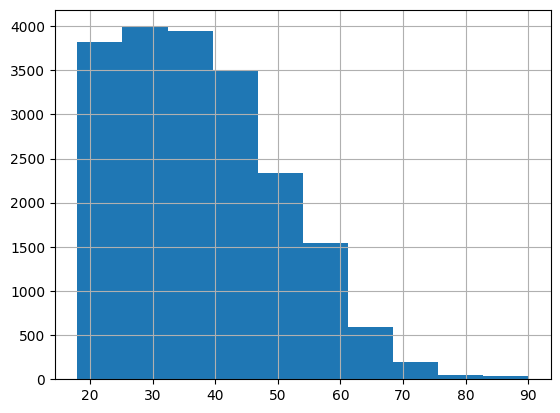

In [146]:
## Visualization to further understand the variables:

##Age: Looks like this is positively skewed with a right tail. Something to consider is ages from 37 onward might not properly be represented.

df["age"].hist()

import matplotlib.pyplot as plt


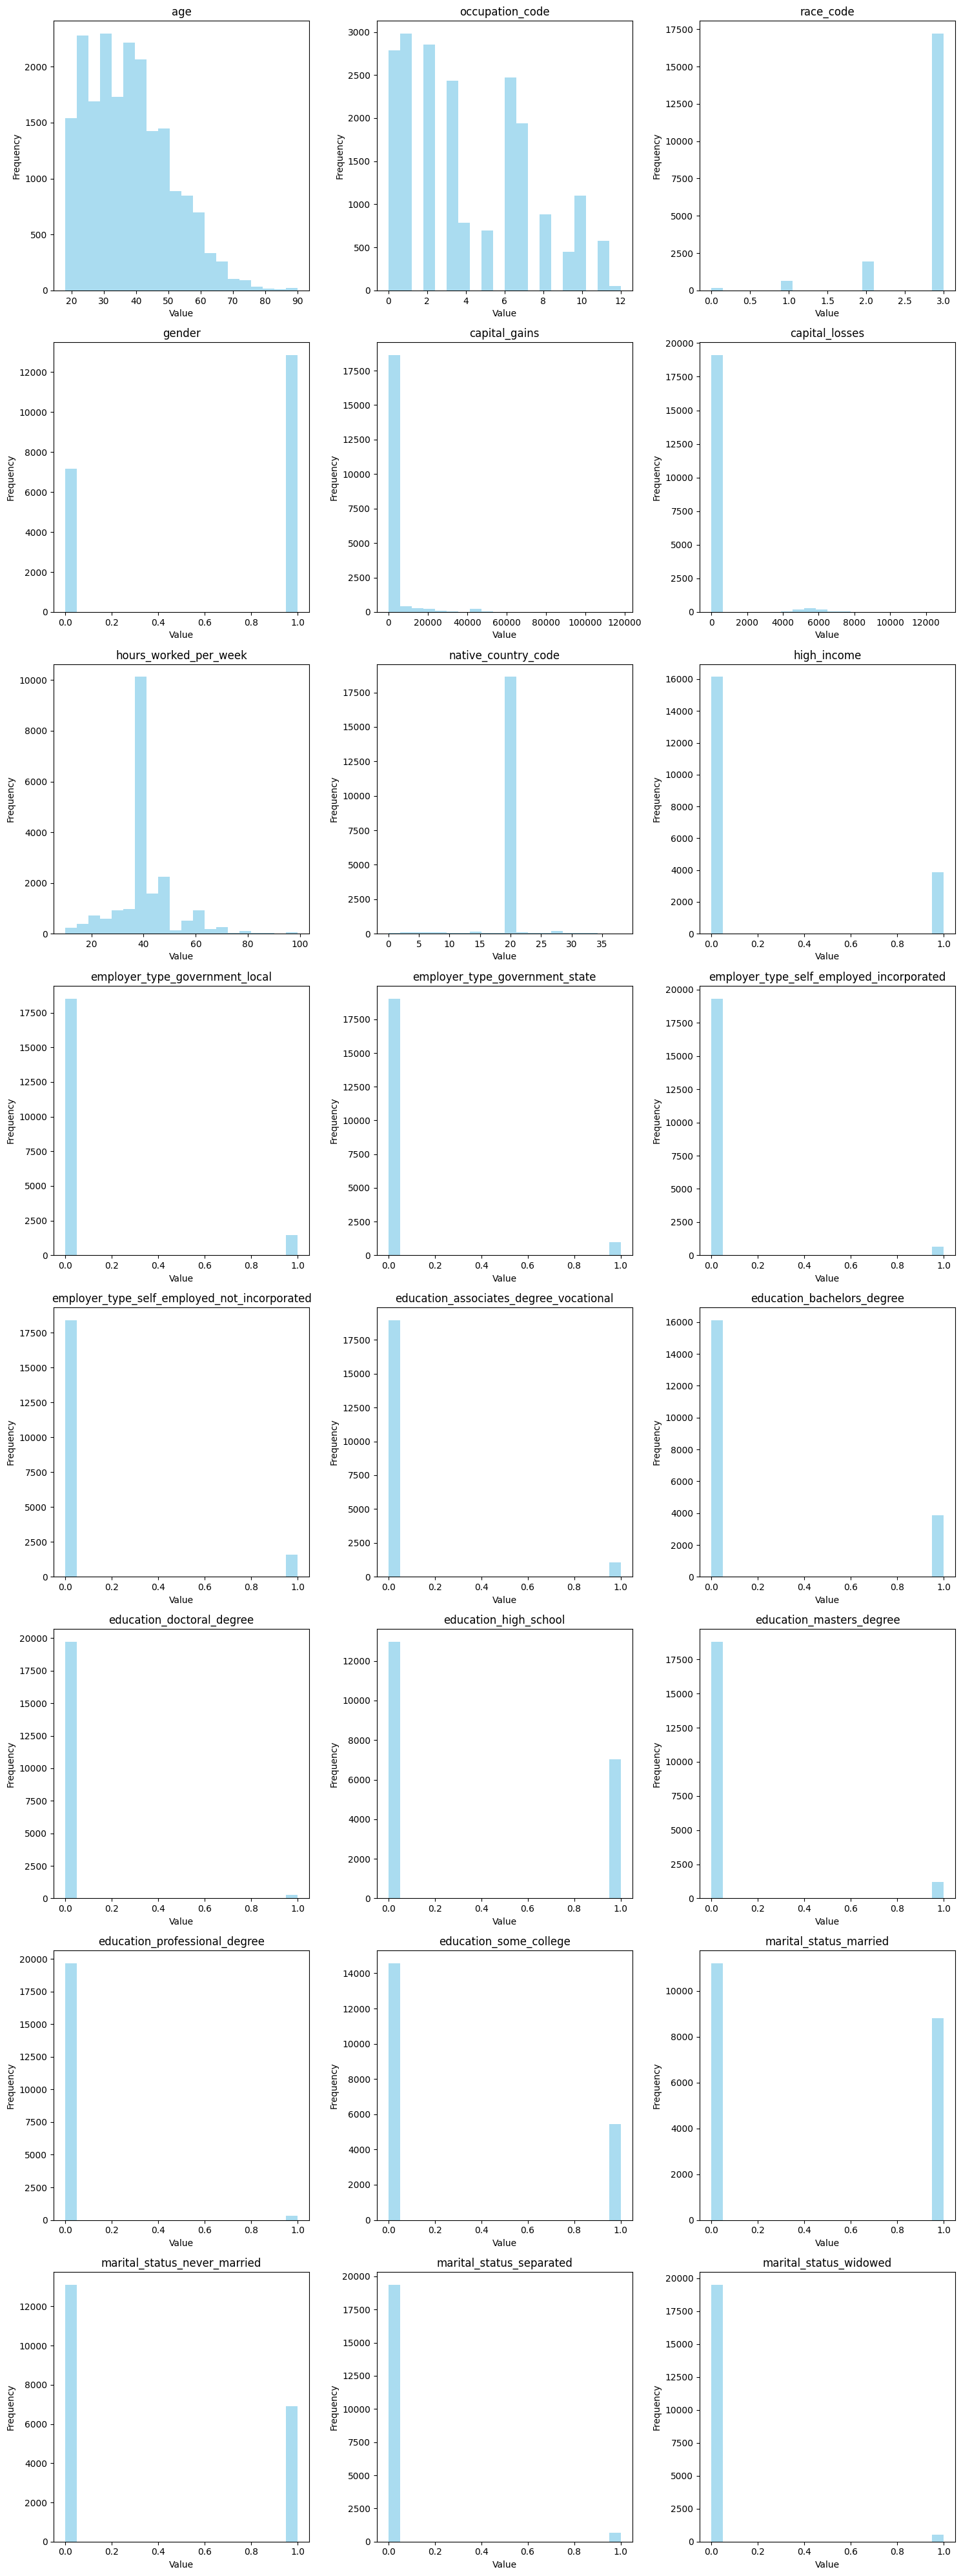

In [147]:
## Distribution: I'm going to check the distribution to see if its centered and that will help determine if normalization or scaling is required

import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Set up subplots
num_plots = len(numerical_columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots - 1) // num_cols + 1

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten axes if necessary
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    ax.hist(df[column], bins=20, color='skyblue', alpha=0.7)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [148]:
## I am going to check the dscriptive table again to see how the data changed after I encoded the categorical variables because I want to see the changes.

descriptive_stats = df.describe()
print(descriptive_stats)

                age  occupation_code     race_code        gender  \
count  20000.000000     20000.000000  20000.000000  20000.000000   
mean      37.774850         4.001750      2.808100      0.641700   
std       12.599246         3.238653      0.526487      0.479513   
min       18.000000         0.000000      0.000000      0.000000   
25%       28.000000         1.000000      3.000000      0.000000   
50%       36.000000         3.000000      3.000000      1.000000   
75%       46.000000         6.000000      3.000000      1.000000   
max       90.000000        12.000000      3.000000      1.000000   

       capital_gains  capital_losses  hours_worked_per_week  \
count   20000.000000    20000.000000           20000.000000   
mean     1625.552850      255.247600              41.294900   
std      7304.803519     1191.963722              11.300558   
min         0.000000        0.000000              10.000000   
25%         0.000000        0.000000              40.000000   
50%      

In [149]:
## We are going to perform normalization because some of the variables have a wider range and that coul cause biases in the algorithm. ( Logistic Regression, SVM, KNN, GBM, Neural Networks)

## When we don't need to normalize are:  Decision Trees, Random Forest, Naive Bayes.

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame containing the data
numerical_columns = df.select_dtypes(include=['float', 'int']).columns

# Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Reassign original non-numerical columns to the scaled DataFrame
for column in df.columns:
    if column not in numerical_columns:
        scaled_df[column] = df[column]

# Print descriptive statistics of the normalized data
descriptive_stats_norm = scaled_df.describe()
print(descriptive_stats_norm)


                age  occupation_code     race_code        gender  \
count  20000.000000     20000.000000  20000.000000  20000.000000   
mean       0.274651         0.333479      0.936033      0.641700   
std        0.174990         0.269888      0.175496      0.479513   
min        0.000000         0.000000      0.000000      0.000000   
25%        0.138889         0.083333      1.000000      0.000000   
50%        0.250000         0.250000      1.000000      1.000000   
75%        0.388889         0.500000      1.000000      1.000000   
max        1.000000         1.000000      1.000000      1.000000   

       capital_gains  capital_losses  hours_worked_per_week  \
count   20000.000000    20000.000000           20000.000000   
mean        0.013793        0.019665               0.351628   
std         0.061980        0.091831               0.126973   
min         0.000000        0.000000               0.000000   
25%         0.000000        0.000000               0.337079   
50%      

employer_type_self_employed_not_incorporated
 education_high_school
 employer_type_government_local                             
employer_type_government_state
marital_status_never_married
 marital_status_separated
 marital_status_widowed
  education_some_college  I tried to remove these features prior, but that lowered the accuracy of the model so I decided to remove this idea.

In [150]:
## Now we will split the data 70/30 using stratified splitting to make sure we have an equal of amount of high income 0 and 1 to makes sure there is no biases.

from sklearn.model_selection import train_test_split

# Split the data into features (X_scaled) and target variable (y_scaled)
X_scaled = scaled_df.drop(columns=['high_income'])
y_scaled = scaled_df['high_income']

# Perform stratified splitting with a 70-30 split
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.7, stratify=y_scaled, random_state=42)





In [151]:
## Now we will try different models for normalize data (  Logistic Regression, SVM, KNN, GBM, Neural Networks)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "GBM": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier()
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train_scaled, y_train_scaled)
    y_pred = classifier.predict(X_test_scaled)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_scaled, y_pred)
    precision = precision_score(y_test_scaled, y_pred)
    recall = recall_score(y_test_scaled, y_pred)
    f1 = f1_score(y_test_scaled, y_pred)
    cm = confusion_matrix(y_test_scaled, y_pred)

    # Print evaluation metrics
    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("="*50)


Training Logistic Regression...

Logistic Regression Evaluation:
Accuracy: 0.8729
Precision: 0.7145
Recall: 0.5681
F1 Score: 0.6330
Confusion Matrix:
[[10687   613]
 [ 1166  1534]]
Training SVM...

SVM Evaluation:
Accuracy: 0.8651
Precision: 0.7024
Recall: 0.5219
F1 Score: 0.5988
Confusion Matrix:
[[10703   597]
 [ 1291  1409]]
Training KNN...

KNN Evaluation:
Accuracy: 0.8529
Precision: 0.6319
Recall: 0.5678
F1 Score: 0.5981
Confusion Matrix:
[[10407   893]
 [ 1167  1533]]
Training GBM...

GBM Evaluation:
Accuracy: 0.8819
Precision: 0.7334
Recall: 0.6093
F1 Score: 0.6656
Confusion Matrix:
[[10702   598]
 [ 1055  1645]]
Training Neural Network...

Neural Network Evaluation:
Accuracy: 0.8733
Precision: 0.6756
Recall: 0.6596
F1 Score: 0.6675
Confusion Matrix:
[[10445   855]
 [  919  1781]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [152]:
## going to try to improve our model by increasing iterations

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define classifiers with increased max_iter
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "GBM": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(max_iter=2000)
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train_scaled, y_train_scaled)
    y_pred = classifier.predict(X_test_scaled)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_scaled, y_pred)
    precision = precision_score(y_test_scaled, y_pred)
    recall = recall_score(y_test_scaled, y_pred)
    f1 = f1_score(y_test_scaled, y_pred)
    cm = confusion_matrix(y_test_scaled, y_pred)

    # Print evaluation metrics
    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("="*50)


Training Logistic Regression...

Logistic Regression Evaluation:
Accuracy: 0.8729
Precision: 0.7145
Recall: 0.5681
F1 Score: 0.6330
Confusion Matrix:
[[10687   613]
 [ 1166  1534]]
Training SVM...

SVM Evaluation:
Accuracy: 0.8651
Precision: 0.7024
Recall: 0.5219
F1 Score: 0.5988
Confusion Matrix:
[[10703   597]
 [ 1291  1409]]
Training KNN...

KNN Evaluation:
Accuracy: 0.8529
Precision: 0.6319
Recall: 0.5678
F1 Score: 0.5981
Confusion Matrix:
[[10407   893]
 [ 1167  1533]]
Training GBM...

GBM Evaluation:
Accuracy: 0.8819
Precision: 0.7334
Recall: 0.6093
F1 Score: 0.6656
Confusion Matrix:
[[10702   598]
 [ 1055  1645]]
Training Neural Network...

Neural Network Evaluation:
Accuracy: 0.8715
Precision: 0.6890
Recall: 0.6081
F1 Score: 0.6461
Confusion Matrix:
[[10559   741]
 [ 1058  1642]]


In [153]:
## checking df_predict:

print(df_predict.head())  # Display the first few rows of the DataFrame
print(df_predict)


missing_data = df_predict.isna().sum()
print(missing_data)


       age   employer_type   highest_education_completed marital_status  \
id                                                                        
20001   35  non_government              bachelors_degree        married   
20002   49  non_government    associates_degree_academic        married   
20003   50  non_government  associates_degree_vocational      separated   
20004   23  non_government                   high_school  never_married   
20005   46  non_government                  some_college        married   

       occupation_code  race_code  gender  capital_gains  capital_losses  \
id                                                                         
20001                6          3       1              0               0   
20002                3          3       1              0               0   
20003                1          3       0              0               0   
20004                3          3       0              0               0   
20005             

In [155]:
## cross validate normalized prediction data:

from sklearn.model_selection import cross_val_score

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "GBM": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier()
}

# Perform cross-validation for each classifier
for name, classifier in classifiers.items():
    print(f"Cross-validating {name}...")
    # Perform cross-validation with 5 folds
    cv_scores = cross_val_score(classifier, X_test_scaled, y_test_scaled, cv=5, scoring='accuracy')

    # Print cross-validation scores
    print(f"{name} Cross-Validation Scores: {cv_scores}")
    print(f"Mean Accuracy: {cv_scores.mean():.4f}")
    print("="*50)





Cross-validating Logistic Regression...
Logistic Regression Cross-Validation Scores: [0.87642857 0.86571429 0.87357143 0.87857143 0.87214286]
Mean Accuracy: 0.8733
Cross-validating SVM...
SVM Cross-Validation Scores: [0.87678571 0.85892857 0.8725     0.87178571 0.87214286]
Mean Accuracy: 0.8704
Cross-validating KNN...
KNN Cross-Validation Scores: [0.86107143 0.84       0.8675     0.86035714 0.85642857]
Mean Accuracy: 0.8571
Cross-validating GBM...
GBM Cross-Validation Scores: [0.88678571 0.86928571 0.88642857 0.88535714 0.87964286]
Mean Accuracy: 0.8815
Cross-validating Neural Network...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Cross-Validation Scores: [0.88107143 0.86178571 0.87785714 0.87857143 0.87214286]
Mean Accuracy: 0.8743


In [156]:
## trying different iterations (second attempt for improved cross validation)

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "GBM": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Scale input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform cross-validation for each classifier
for name, classifier in classifiers.items():
    print(f"Cross-validating {name}...")
    # Perform cross-validation with 5 folds
    cv_scores = cross_val_score(classifier, X_test_scaled, y_test_scaled, cv=5, scoring='accuracy')

    # Print cross-validation scores
    print(f"{name} Cross-Validation Scores: {cv_scores}")
    print(f"Mean Accuracy: {cv_scores.mean():.4f}")
    print("="*50)


Cross-validating Logistic Regression...
Logistic Regression Cross-Validation Scores: [0.87714286 0.86571429 0.87321429 0.87964286 0.87428571]
Mean Accuracy: 0.8740
Cross-validating SVM...
SVM Cross-Validation Scores: [0.88107143 0.86       0.87178571 0.8725     0.8775    ]
Mean Accuracy: 0.8726
Cross-validating KNN...
KNN Cross-Validation Scores: [0.86785714 0.84178571 0.86535714 0.86357143 0.86357143]
Mean Accuracy: 0.8604
Cross-validating GBM...
GBM Cross-Validation Scores: [0.88678571 0.86964286 0.88642857 0.88535714 0.87964286]
Mean Accuracy: 0.8816
Cross-validating Neural Network...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Neural Network Cross-Validation Scores: [0.87178571 0.85321429 0.87535714 0.87321429 0.87071429]
Mean Accuracy: 0.8689


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [157]:
## This is splitting our original df data because some algorithms don't need normalize data. such as Decision Trees, Random Forest, Naive Bayes.
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['high_income'])
y = df['high_income']

# Perform stratified train-test split with a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, stratify=y, random_state=42)




In [158]:
## now we will do Decision Trees, Random Forest, Naive Bayes, etc.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics
    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("="*50)



Training Decision Tree...

Decision Tree Evaluation:
Accuracy: 0.8393
Precision: 0.5788
Recall: 0.6119
F1 Score: 0.5949
Confusion Matrix:
[[10098  1202]
 [ 1048  1652]]
Training Random Forest...

Random Forest Evaluation:
Accuracy: 0.8681
Precision: 0.6749
Recall: 0.6096
F1 Score: 0.6406
Confusion Matrix:
[[10507   793]
 [ 1054  1646]]
Training AdaBoost...

AdaBoost Evaluation:
Accuracy: 0.8804
Precision: 0.7252
Recall: 0.6119
F1 Score: 0.6637
Confusion Matrix:
[[10674   626]
 [ 1048  1652]]
Training Naive Bayes...

Naive Bayes Evaluation:
Accuracy: 0.8457
Precision: 0.6299
Recall: 0.4848
F1 Score: 0.5479
Confusion Matrix:
[[10531   769]
 [ 1391  1309]]
Training Logistic Regression...

Logistic Regression Evaluation:
Accuracy: 0.8386
Precision: 0.7103
Recall: 0.2752
F1 Score: 0.3967
Confusion Matrix:
[[10997   303]
 [ 1957   743]]
Training Quadratic Discriminant Analysis...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Quadratic Discriminant Analysis Evaluation:
Accuracy: 0.8386
Precision: 0.5970
Recall: 0.5026
F1 Score: 0.5457
Confusion Matrix:
[[10384   916]
 [ 1343  1357]]
Training XGBoost...

XGBoost Evaluation:
Accuracy: 0.8773
Precision: 0.6966
Recall: 0.6444
F1 Score: 0.6695
Confusion Matrix:
[[10542   758]
 [  960  1740]]
Training LightGBM...
[LightGBM] [Info] Number of positive: 1157, number of negative: 4843
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 445
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192833 -> initscore=-1.431704
[LightGBM] [Info] Start training from score -1.431704

LightGBM Evaluation:
Accuracy: 0.8781
Precision: 0.7069
Recall: 0.6289
F1 Score: 0.6656
Confusion Matrix:


In [159]:
## Cross validation

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}

# Perform cross-validation for each classifier
for name, classifier in classifiers.items():
    print(f"Training {name}...")

    # Perform cross-validation
    scores = cross_val_score(classifier, X_train, y_train, cv=5)

    # Print cross-validation scores
    print(f"\n{name} Cross-Validation Scores:")
    print(scores)
    print(f"Mean Accuracy: {scores.mean():.4f}")
    print("="*50)


Training Decision Tree...

Decision Tree Cross-Validation Scores:
[0.82333333 0.8425     0.8425     0.82833333 0.8375    ]
Mean Accuracy: 0.8348
Training Random Forest...

Random Forest Cross-Validation Scores:
[0.86583333 0.86833333 0.86833333 0.86083333 0.87833333]
Mean Accuracy: 0.8683
Training AdaBoost...

AdaBoost Cross-Validation Scores:
[0.86666667 0.8925     0.855      0.86916667 0.89833333]
Mean Accuracy: 0.8763
Training Naive Bayes...

Naive Bayes Cross-Validation Scores:
[0.835      0.84583333 0.84166667 0.83916667 0.84416667]
Mean Accuracy: 0.8412
Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Logistic Regression Cross-Validation Scores:
[0.85833333 0.83833333 0.84083333 0.835      0.8675    ]
Mean Accuracy: 0.8480
Training Quadratic Discriminant Analysis...

Quadratic Discriminant Analysis Cross-Validation Scores:
[0.83416667 0.8425     0.84       0.83083333 0.83666667]
Mean Accuracy: 0.8368


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In my previous runs the highest accuracy I was able to get was GBM Evaluation:
Accuracy: 0.8819
Precision: 0.7334
Recall: 0.6093
F1 Score: 0.6656
Confusion Matrix:
[[10702   598]
 [ 1055  1645]]

 My next step on trying to see if I can further increase accuracy is to check for data imbalance and maybe try sampling balancing technique. I might try to reduce my features as well based on previous discoveries I made through visualizations and correlation analysis.

In [168]:
## Pre processing the df_predict data to run into our model GBM

import pandas as pd

# Create dummy variables for employer_type
employer_type_dummies = pd.get_dummies(df_predict["employer_type"], prefix="employer_type", drop_first=True)

# Drop the 'non_government' category and create dummy variables for the remaining categories
employer_type_dummies = pd.get_dummies(df_predict["employer_type"].replace('non_government', None), prefix="employer_type", drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df_predict = pd.concat([df_predict, employer_type_dummies], axis=1)

# Drop the original 'employer_type' column
df_predict.drop("employer_type", axis=1, inplace=True)

# Create dummy variables for highest_education_completed
education_dummies = pd.get_dummies(df_predict["highest_education_completed"], prefix="education", drop_first=True)

# Create dummy variables for marital_status
marital_status_dummies = pd.get_dummies(df_predict["marital_status"], prefix="marital_status", drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df_predict = pd.concat([df_predict, education_dummies, marital_status_dummies], axis=1)

# Drop the original 'highest_education_completed' and 'marital_status' columns
df_predict.drop(["highest_education_completed", "marital_status"], axis=1, inplace=True)

# Convert DataFrame to integers
df_predict = df_predict.astype(int)





In [169]:
#### Pre processing the df_predict data to run into our model GBM Part 2

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

numerical_columns = df_predict.select_dtypes(include=['float', 'int']).columns

# Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_predict[numerical_columns])

# Convert the scaled data back to a DataFrame
scaled_df_predict = pd.DataFrame(scaled_data, columns=numerical_columns)

# Reassign original non-numerical columns to the scaled DataFrame
for column in df_predict.columns:
    if column not in numerical_columns:
        scaled_df_predict[column] = df_predict[column]




In [191]:
## Model of Test data using df_predict

from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

# Assuming gbm_model is your trained GradientBoostingClassifier model

# Extract the feature columns from scaled_df_predict
feature_columns = df_predict.columns

# Use the trained GBM model to make predictions on scaled_df_predict without feature names
gbm_predictions = gbm_model.predict(scaled_df_predict[feature_columns])

# Convert predictions to integers (0 and 1)
gbm_predictions_int = gbm_predictions.astype(int)

# Create a DataFrame with 'id' and 'high_income' predictions
result_df = pd.DataFrame({'id': df_predict.index, 'high_income': gbm_predictions_int}
)

print(result_df)

# Count the number of columns
num_columns = len(result_df.columns)

# Count the number of records (rows)
num_records = len(result_df)

print(f"Number of columns: {num_columns}")
print(f"Number of records: {num_records}")











         id  high_income
0     20001            1
1     20002            0
2     20003            0
3     20004            0
4     20005            0
...     ...          ...
2995  22996            0
2996  22997            0
2997  22998            0
2998  22999            0
2999  23000            1

[3000 rows x 2 columns]
Number of columns: 2
Number of records: 3000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [198]:
## CSV
# Convert id and high_income columns to strings
result_df['id'] = result_df['id'].astype(str)
result_df['high_income'] = result_df['high_income'].astype(str)

# Concatenate id and high_income columns with a comma
result_df['output'] = result_df['id'] + ',' + result_df['high_income']

# Save the concatenated column to a CSV file
result_df['output'].to_csv('Hoang,Diane.csv', index=False, header=False)










**Best Model Results: Training GBM...**

**GBM Evaluation:**
Accuracy: **0.8819**
Precision: 0.7333
Recall: 0.6089
F1 Score: 0.6653
Confusion Matrix:
[[10702   598]
 [ 1056  1644]]

**GBM Cross Validation Results:**

Cross-validating GBM...
GBM Cross-Validation Scores: [0.88464286 0.87       0.88642857 0.88535714 0.87964286]
Mean Accuracy: **0.8812**

**Conclusion:**

If I had more time on this project, I was thinking about trying oversampling method (already tried undersampling, that didn't improve the accuracy score. Maybe I should add more values to high income using the mean as well. I did narrow some features based on the correlation analysis but that lowered the accuracy, if I had time I would of looked into more feature selection methods and see if that will improve accuracy. I don't think trying more models is the answer here, but exploring more ways to pre-process the data.

**Things to check for next time or try:**

- Dimensionality Reduction
- Data Balancing
- Try KNN imputation
- Try creating new features.


In [161]:
##ARCHIVES (IGNORE)## # Split the resampled data into training and testing sets (included work here, but didn't like the results from trying this process)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)






In [ ]:
##ARCHIVES (IGNORE)## Doing algorithms again (included work here, but didn't like the results from trying this process)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics
    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("="*50)


In [160]:
##ARCHIVES (IGNORE)## using undersampling method (Tried this made my accuracy lower because we reduced data) (included work here, but didn't like the results from trying this process)

# Assuming df is your DataFrame
income_counts = df['high_income'].value_counts()

print("Counts of 'high_income' values:")
print(income_counts)




from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming df is your DataFrame

# Separate features (X) and target variable (y)
X = df.drop(columns=['high_income'])
y = df['high_income']

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check the balance after resampling
print("Counts of 'high_income' values after resampling:")
print(pd.Series(y_resampled).value_counts())



Counts of 'high_income' values:
high_income
0    16143
1     3857
Name: count, dtype: int64
Counts of 'high_income' values after resampling:
high_income
0    3857
1    3857
Name: count, dtype: int64


ARCHIVES (IGNORE)
Self-Employed Not Incorporated (-0.00)

Very weak negative correlation: Self-employed individuals with non-incorporated businesses have a slightly lower likelihood of having a high income compared to those in the reference category.
High School (-0.01)

Weak negative correlation: Individuals with only a high school education have a slightly lower likelihood of having a high income compared to those in the reference category.
Government Federal (-0.03)

Negative correlation: Individuals employed by federal government entities are less likely to have a high income compared to those in the reference category.
Government State (-0.03)

Negative correlation: Individuals employed by state government entities are less likely to have a high income compared to those in the reference category.
Never Married (-0.28)

Strong negative correlation: Individuals who have never been married are significantly less likely to have a high income compared to those in the reference category.
Separated (-0.06)

Weak negative correlation: Individuals who are separated have a slightly lower likelihood of having a high income compared to those in the reference category.
Widowed (-0.04)

Weak negative correlation: Widowed individuals have a slightly lower likelihood of having a high income compared to those in the reference category.
Some College (-0.04)

Weak negative correlation: Individuals with some college education have a slightly lower likelihood of having a high income compared to those in the reference category.
